In [2]:
import sys,os,json
import collections,math
import time,datetime,pytz
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.colors import ListedColormap
import seaborn as sns
import operator
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

############################################
########## Plot Style Declaration ##########
# Set the style globally
# Alternatives include bmh, fivethirtyeight, ggplot,
# dark_background, seaborn-deep, etc
# plt.style.use('ggplot')
plt.style.use('seaborn-white')

plt.rcParams['font.family'] = 'times new roman'
# plt.rcParams['font.serif'] = 'Ubuntu'
# plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 15
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

##########################################
########## data set declaration ##########
path_processed = "data/processed/"
path_final = "data/final/"

##################################
########## End of Setup ##########

##### Geographical Change #####
import geopy
from geopy import distance as geopy_distance
coords_1 = (52.2296756, 21.0122287)
coords_2 = (52.406374, 16.9251681)
print (geopy.distance.distance(coords_1, coords_2).km)

279.35290160430094


In [3]:
df_phone = pd.read_csv("./data/hhar/Activity recognition exp/Phones_accelerometer.csv")

In [4]:
df_watch = pd.read_csv("./data/hhar/Activity recognition exp/Watch_accelerometer.csv")

In [5]:
a_phone = df_phone[df_phone['User']=='a']
a_watch = df_watch[df_watch['User']=='a']

In [10]:
a_phone.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696633908,1424696631913248572,-5.958191,0.688065,8.135345,a,nexus4,nexus4_1,stand
1,1,1424696633909,1424696631918283972,-5.952240,0.670212,8.136536,a,nexus4,nexus4_1,stand
2,2,1424696633918,1424696631923288855,-5.995087,0.653549,8.204376,a,nexus4,nexus4_1,stand
3,3,1424696633919,1424696631928385290,-5.942718,0.676163,8.128204,a,nexus4,nexus4_1,stand
4,4,1424696633929,1424696631933420691,-5.991516,0.641647,8.135345,a,nexus4,nexus4_1,stand


In [11]:
a_phone.tail()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
1362515,110391,1424698517360,12234742305000,6.895215,-1.685497,7.661350,a,samsungold,samsungold_2,bike
1362516,110392,1424698517369,12234751796000,7.048442,-1.685497,7.661350,a,samsungold,samsungold_2,bike
1362517,110393,1424698517390,12234772243000,7.201669,-1.838724,7.661350,a,samsungold,samsungold_2,bike
1362518,110394,1424698517410,12234792293000,7.048442,-1.532270,7.508123,a,samsungold,samsungold_2,bike
1362519,110395,1424698517419,12234801815000,6.741988,-1.532270,7.354896,a,samsungold,samsungold_2,bike


In [22]:
Counter(a_phone['Model'])

Counter({'nexus4': 646825,
         's3': 327917,
         's3mini': 167886,
         'samsungold': 219892})

In [23]:
a_phone_nexus4 = a_phone[a_phone['Model']=='nexus4']
a_phone_s3 = a_phone[a_phone['Model']=='s3']
a_phone_s3mini = a_phone[a_phone['Model']=='s3mini']
a_phone_samsungold = a_phone[a_phone['Model']=='samsungold']

In [32]:
Counter(a_watch['Model'])

Counter({'gear': 42578, 'lgwatch': 453846})

In [33]:
a_watch_gear = a_watch[a_watch['Model']=='gear']
a_watch_lgwatch = a_watch[a_watch['Model']=='lgwatch']

In [24]:
a_phone_nexus4.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696633908,1424696631913248572,-5.958191,0.688065,8.135345,a,nexus4,nexus4_1,stand
1,1,1424696633909,1424696631918283972,-5.952240,0.670212,8.136536,a,nexus4,nexus4_1,stand
2,2,1424696633918,1424696631923288855,-5.995087,0.653549,8.204376,a,nexus4,nexus4_1,stand
3,3,1424696633919,1424696631928385290,-5.942718,0.676163,8.128204,a,nexus4,nexus4_1,stand
4,4,1424696633929,1424696631933420691,-5.991516,0.641647,8.135345,a,nexus4,nexus4_1,stand


In [43]:
1424696631913248572/pow(10,9)

1424696631.9132485

In [25]:
a_phone_s3.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
646825,0,1424696636908,52546413802000,-6.090849,0.565032,7.623138,a,s3,s3_1,stand
646826,1,1424696636919,52546425141000,-6.090849,0.593762,7.603985,a,s3,s3_1,stand
646827,2,1424696636933,52546438690000,-6.100426,0.612916,7.651869,a,s3,s3_1,stand
646828,3,1424696636939,52546445342000,-6.033388,0.603339,7.651869,a,s3,s3_1,stand
646829,4,1424696636949,52546455524000,-6.081272,0.641646,7.671022,a,s3,s3_1,stand


In [36]:
print(1424696636949 - 1424696636908)
print(52546455524000 - 52546413802000)

41
41722000


In [26]:
a_phone_s3mini.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
974742,0,1424696637507,14347532400000,5.859808,-1.183933,7.475895,a,s3mini,s3mini_1,stand
974743,1,1424696637507,14347541365000,5.874174,-1.165976,7.478289,a,s3mini,s3mini_1,stand
974744,2,1424696637507,14347551459000,5.872977,-1.145625,7.474698,a,s3mini,s3mini_1,stand
974745,3,1424696637508,14347562559000,5.870583,-1.152808,7.477092,a,s3mini,s3mini_1,stand
974746,4,1424696637508,14347570945000,5.853823,-1.192313,7.457938,a,s3mini,s3mini_1,stand


In [27]:
a_phone_samsungold.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
1142628,0,1424696633933,280361071531000,-5.669399,0.153227,7.814577,a,samsungold,samsungold_1,stand
1142629,1,1424696633953,280361091551000,-5.669399,0.306454,7.661350,a,samsungold,samsungold_1,stand
1142630,2,1424696633983,280361121549000,-5.669399,0.306454,7.814577,a,samsungold,samsungold_1,stand
1142631,3,1424696634014,280361152281000,-5.669399,0.306454,7.661350,a,samsungold,samsungold_1,stand
1142632,4,1424696634034,280361172300000,-5.669399,0.459681,7.661350,a,samsungold,samsungold_1,stand


In [31]:
1424696634034 - 1424696633933

101

In [30]:
280361172300000 - 280361071531000

100769000

In [34]:
a_watch_gear.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696638740,27920678471000,-0.565032,-9.572019,-0.614113,a,gear,gear_1,stand
1,1,1424696638740,27920681910000,-0.832584,-9.713276,-0.606930,a,gear,gear_1,stand
2,2,1424696638740,27920692014000,-1.018134,-9.935339,-0.544082,a,gear,gear_1,stand
3,3,1424696638741,27920701983000,-1.222838,-10.142437,-0.566229,a,gear,gear_1,stand
4,4,1424696638741,27920711906000,-1.577180,-10.480618,-0.402824,a,gear,gear_1,stand


In [35]:
a_watch_lgwatch.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
42578,0,1424696633911,207817520343346,-9.160782,-3.759674,1.396469,a,lgwatch,lgwatch_1,stand
42579,1,1424696633916,207817525287194,-9.198868,-3.788239,1.420273,a,lgwatch,lgwatch_1,stand
42580,2,1424696633921,207817530231042,-9.208389,-3.804901,1.439316,a,lgwatch,lgwatch_1,stand
42581,3,1424696633926,207817535174889,-9.210770,-3.759674,1.446457,a,lgwatch,lgwatch_1,stand
42582,4,1424696633931,207817540118737,-9.222671,-3.735870,1.377426,a,lgwatch,lgwatch_1,stand


In [45]:
aaa[:2]

'ac'

In [18]:
#### arrival time
t1 = 1424696633.908
print (time.ctime(t1))
t2 = 1424698517.419
print (time.ctime(t2))

Mon Feb 23 05:03:53 2015
Mon Feb 23 05:35:17 2015


In [21]:
#### creation time
t1 = 1424696631.913248572
print (time.ctime(t1))
t2 = 1223480181.5000
print (time.ctime(t2))


Mon Feb 23 05:03:51 2015
Wed Oct  8 08:36:21 2008


In [37]:
if 'accelerometer' in 'd-s3_2-stairsup-Phones_accelerometer':
    print(1)

1


In [38]:
pair1 = 'd-s3_2-stairsup-Phones_accelerometer'
nameElem = pair1.split('-')
curLabel = '-'.join(nameElem[:-1])

In [39]:
nameElem

['d', 's3_2', 'stairsup', 'Phones_accelerometer']

In [40]:
curLabel

'd-s3_2-stairsup'

In [9]:
a_watch.describe()

,Index,Arrival_Time,Creation_Time,x,y,z
count,496424.000000,4.964240e+05,4.964240e+05,496424.000000,496424.000000,496424.000000
mean,152880.857330,1.424698e+12,1.804284e+14,-8.434637,-2.772951,1.599493
std,118811.498008,5.575266e+05,5.688078e+13,2.937981,3.600365,2.863248
min,0.000000,1.424697e+12,1.572705e+12,-19.669525,-19.703400,-19.613300
25%,40763.750000,1.424697e+12,2.078616e+14,-9.425003,-5.352142,-0.149039
50%,133030.500000,1.424698e+12,2.084741e+14,-8.111038,-3.345298,1.356003
75%,257136.250000,1.424698e+12,2.090868e+14,-7.094620,-1.595917,2.608078
max,381242.000000,1.424699e+12,2.097010e+14,13.869308,19.612701,19.927063


In [27]:
df.head(30)

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696633908,1424696631913248572,-5.958191,0.688065,8.135345,a,nexus4,nexus4_1,stand
1,1,1424696633909,1424696631918283972,-5.952240,0.670212,8.136536,a,nexus4,nexus4_1,stand
2,2,1424696633918,1424696631923288855,-5.995087,0.653549,8.204376,a,nexus4,nexus4_1,stand
3,3,1424696633919,1424696631928385290,-5.942718,0.676163,8.128204,a,nexus4,nexus4_1,stand
4,4,1424696633929,1424696631933420691,-5.991516,0.641647,8.135345,a,nexus4,nexus4_1,stand
5,5,1424696633929,1424696631938456091,-5.965332,0.629745,8.128204,a,nexus4,nexus4_1,stand
6,6,1424696633938,1424696631943522009,-5.991516,0.635696,8.162720,a,nexus4,nexus4_1,stand
7,7,1424696633939,1424696631948496374,-5.915344,0.630936,8.105591,a,nexus4,nexus4_1,stand
8,8,1424696633951,1424696631953592810,-5.984375,0.694016,8.067505,a,nexus4,nexus4_1,stand
9,9,1424696633952,1424696631960428747,-5.937958,0.715439,8.090118,a,nexus4,nexus4_1,stand


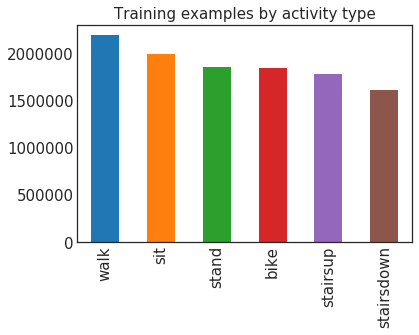

In [5]:
df['gt'].value_counts().plot(kind='bar', title='Training examples by activity type');

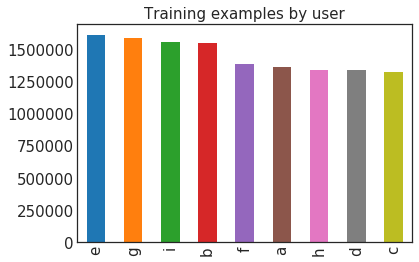

In [6]:
df['User'].value_counts().plot(kind='bar', title='Training examples by user');

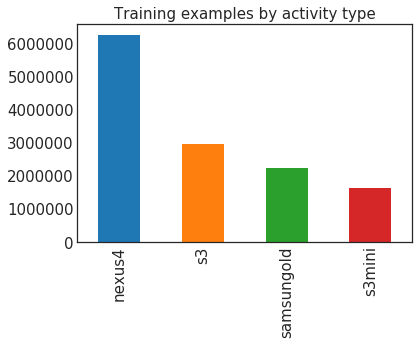

In [11]:
df['Model'].value_counts().plot(kind='bar', title='Training examples by activity type');

In [18]:
nexus = df[df['Model']=='nexus4']
s3 = df[df['Model']=='s3']
samsungold = df[df['Model']=='samsungold']
s3mini = df[df['Model']=='s3mini']

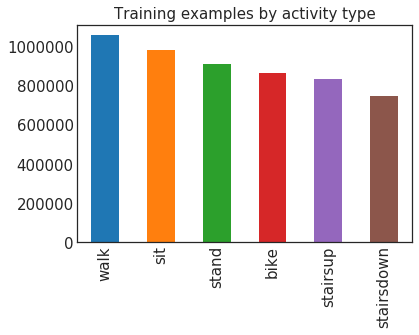

In [13]:
nexus['gt'].value_counts().plot(kind='bar', title='Training examples by activity type');

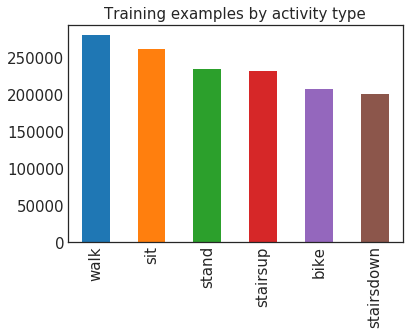

In [20]:
s3mini['gt'].value_counts().plot(kind='bar', title='Training examples by activity type');

In [16]:
nexus['gt'].value_counts()/100

walk          10603.33
sit            9847.31
stand          9108.02
bike           8637.13
stairsup       8365.90
stairsdown     7490.63
Name: gt, dtype: float64

In [23]:
s3['gt'].value_counts()/75

walk          6599.253333
sit           6345.320000
stand         5716.760000
bike          5466.826667
stairsup      5316.800000
stairsdown    4710.120000
Name: gt, dtype: float64

In [24]:
samsungold['gt'].value_counts()/25

bike          14580.00
walk          14245.80
stairsup      12562.96
stairsdown    12527.40
stand         11085.20
sit           10768.72
Name: gt, dtype: float64

In [25]:
s3mini['gt'].value_counts()/50

walk          5619.58
sit           5241.42
stand         4696.06
stairsup      4651.72
bike          4146.64
stairsdown    4007.78
Name: gt, dtype: float64

In [29]:
nexus['gt'].value_counts()/100 + s3['gt'].value_counts()/75 + s3mini['gt'].value_counts()/50 + samsungold['gt'].value_counts()/25 

bike          32830.596667
sit           32202.770000
stairsdown    28735.930000
stairsup      30897.380000
stand         30606.040000
walk          37067.963333
Name: gt, dtype: float64

In [30]:
np.sum(nexus['gt'].value_counts()/100) + np.sum(s3['gt'].value_counts()/75) +\
np.sum(samsungold['gt'].value_counts()/25) + np.sum(s3mini['gt'].value_counts()/50)

192340.68

In [7]:
def plot_activity(activity, df):
    data = df[df['gt'] == activity][['x', 'y', 'z']][:200]
    axis = data.plot(subplots=True, figsize=(16, 12), 
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

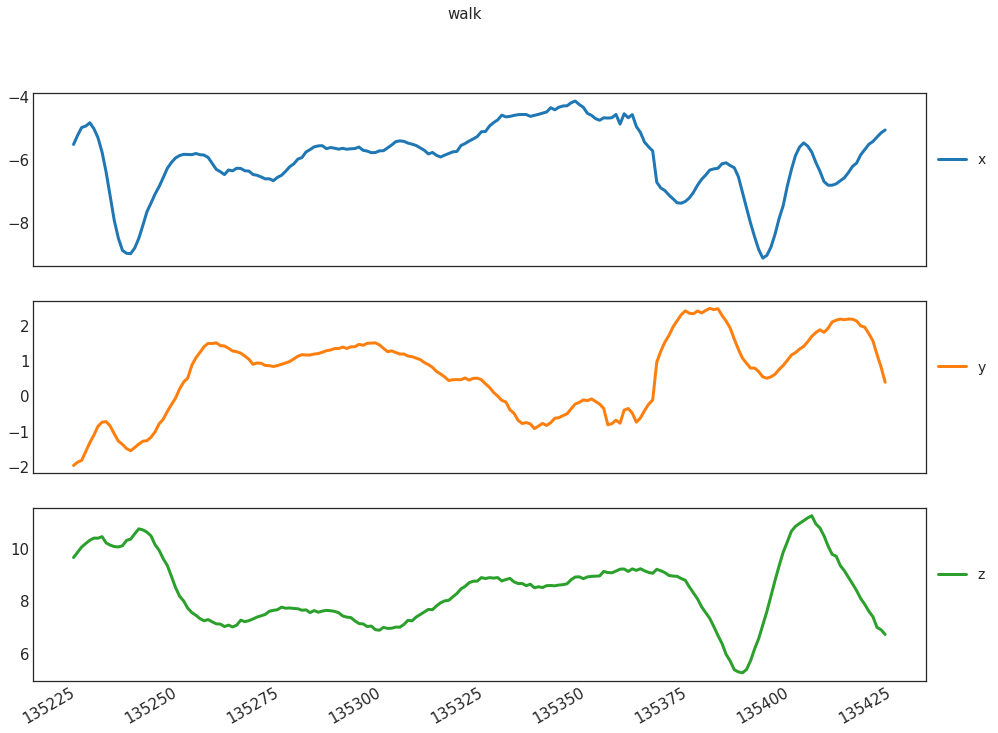

In [8]:
plot_activity("walk", df)

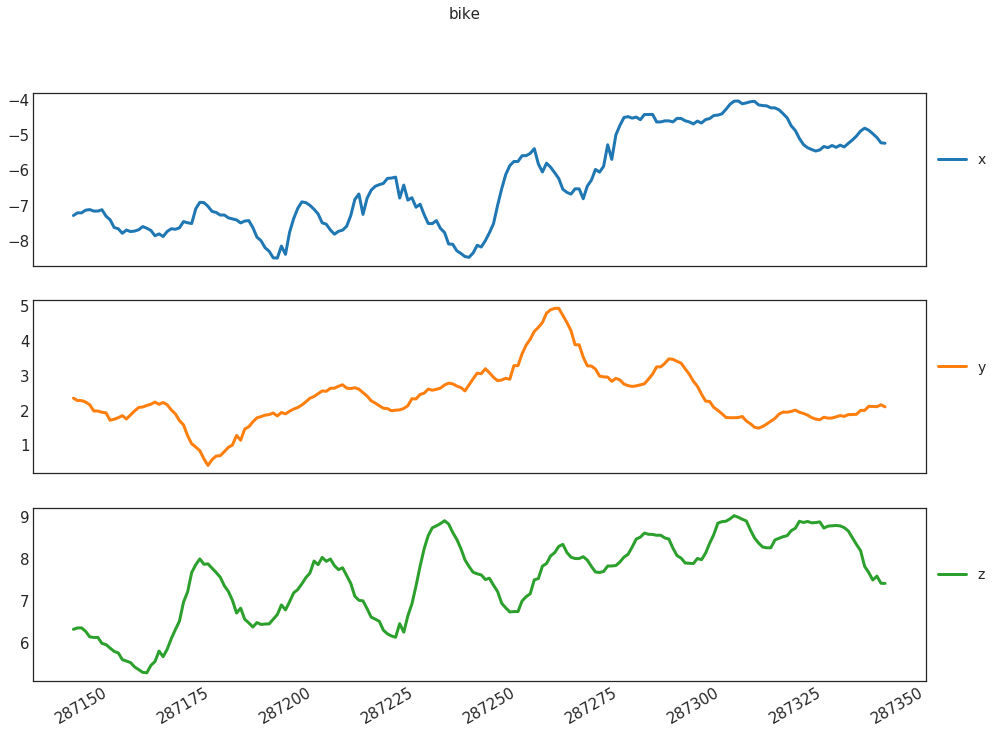

In [9]:
plot_activity("bike", df)

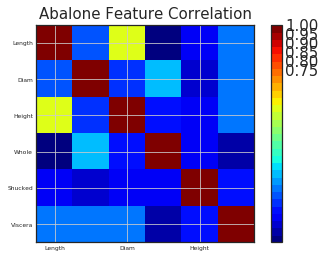

In [10]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Abalone Feature Correlation')
    labels=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(df)